* Imports

In [28]:
import xml.etree.ElementTree as ET
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches


* Plot_Image_With_iou Function

In [26]:
# Function to plot image with bounding boxes and calculate IoU and overlap percentage
def plot_image_with_iou(image_path, objects):
    # Load image
    image = plt.imread(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(image)
    
    for class_label, bbox in objects:
        # Draw bounding box
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                                 linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    
    # Add IoU and overlap percentage as titles
    title = ""
    for idx, (class_label, bbox) in enumerate(objects):
        if idx > 0:
            title += "\n"
        title += f"{class_label}:"
        title += f" IoU={calculate_iou(objects[0][1], bbox):.2f},"
        title += f" Overlap={calculate_overlap(objects[0][1], bbox):.2f}%"
    ax.set_title(title)
    
    # Remove axis
    ax.axis('off')
    
    plt.show()

* Calculate_iou Function

In [27]:
# Function to calculate Intersection over Union (IoU) between two bounding boxes
def calculate_iou(box1, box2):
    # Calculate intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    # Calculate intersection area
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    # Calculate area of both bounding boxes
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    # Calculate union area
    union_area = area_box1 + area_box2 - intersection_area
    # Calculate IoU
    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

* Calculate_Overlap Function

In [24]:
# Function to calculate overlap percentage between two bounding boxes
def calculate_overlap(box1, box2):
    # Calculate intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    # Calculate intersection area
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    # Calculate area of ground truth bounding box
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    # Calculate overlap percentage
    overlap_percentage = (intersection_area / area_box1) * 100
    return overlap_percentage

# Path to dataset and annotation folders
image_dir = r"C:\object\image"
annotation_dir = r"C:\object\annotation"

# List of categories
categories = ["indian cobra", "water snake", "sea snake"]


* conclusion:

Category: indian cobra


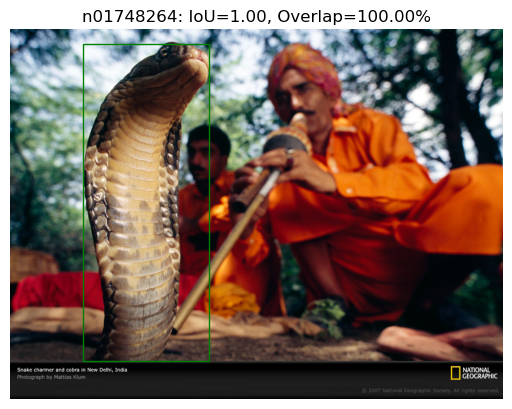

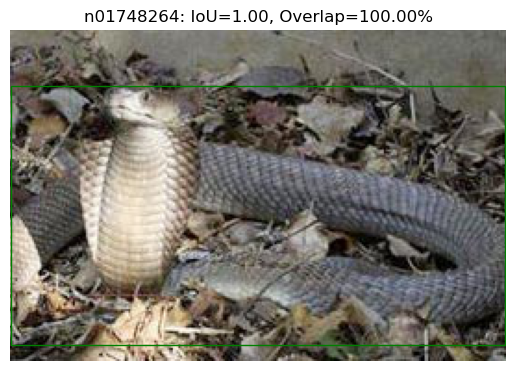

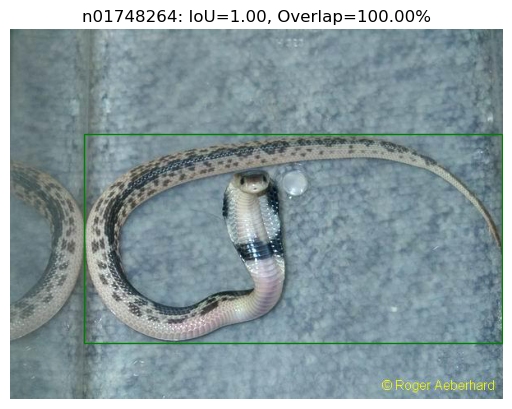

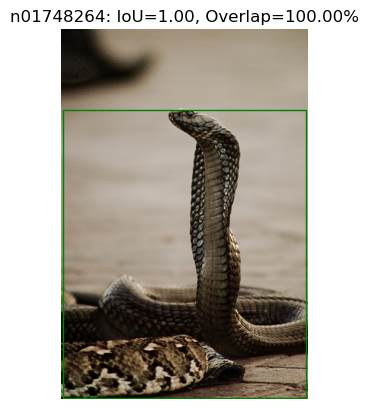

Category: water snake


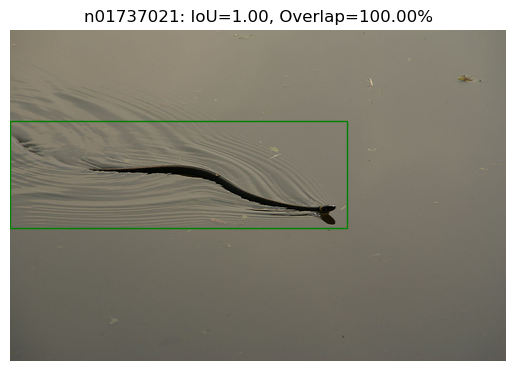

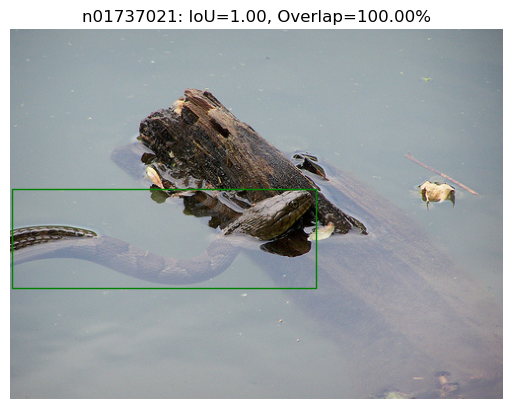

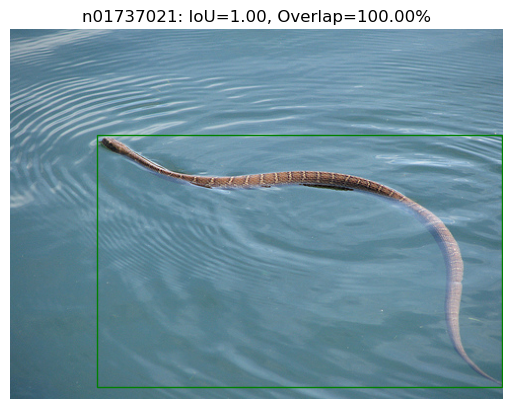

Category: sea snake


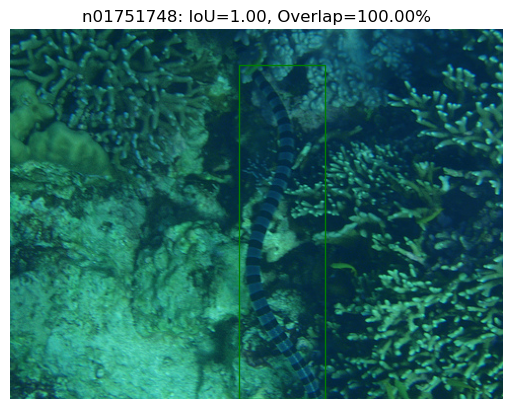

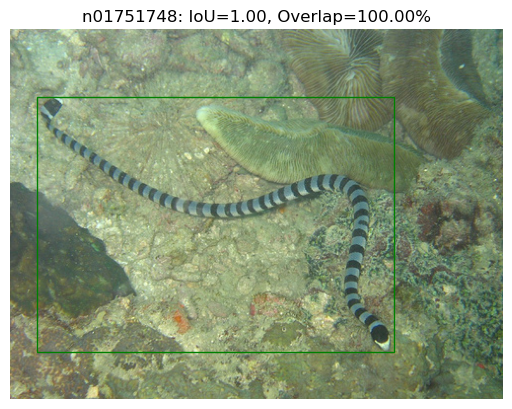

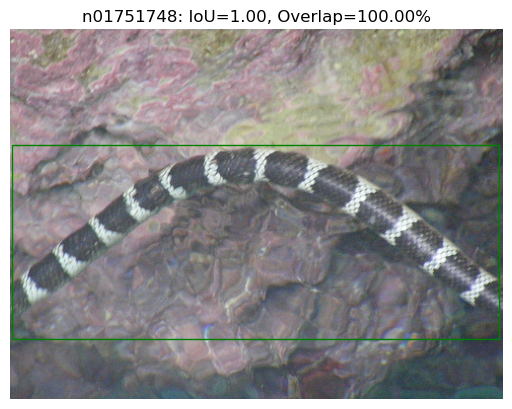

In [25]:
# Select randomly 10 images from each category
selected_images = {}
for category in categories:
    image_files = os.listdir(os.path.join(image_dir, category))
    selected_images[category] = random.sample(image_files, min(10, len(image_files)))

# Plot images with bounding boxes and calculate IoU and overlap percentage
for category in categories:
    print(f"Category: {category}")
    for image_file in selected_images[category]:
        image_name, _ = os.path.splitext(image_file)
        xml_file = os.path.join(annotation_dir, category, image_name + ".xml")
        if not os.path.exists(xml_file):
            continue
        objects = parse_annotation(xml_file)
        image_path = os.path.join(image_dir, category, image_file)
        
        # Plot image with bounding boxes and display IoU and overlap percentage
        plot_image_with_iou(image_path, objects)